# Corporate Credit Rating Forecasting 



### Introduction

This notebook contains the results of the data analysis performed on a set of corporate credit ratings given by ratings agencies to a set of companies. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a company will receive.

The first section section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of a machine learning model. Many diffferent models are tested and the performance of all models are compared. Subsequently, a winner is selected and we do hyperparameter tunning.

In the model evaluation step we use different techniques such as a confusion matrix and scores as F1, Precision and Recall to understand different aspects of the performance of the model. We also perform feature selection to know what financial indicators are more relevant for the rating agencies. 


### The Dataset

There are 30 features for every company of which 25 are financial indicators. 
They can be divided in: <br>
- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding
- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed
- **Debt Ratios**: debtRatio, debtEquityRatio
- **Operating Performance Ratios**: assetTurnover
- **Cash Flow Indicator Ratios**: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio 


### Libraries used:
- pandas
- numpy
- matplotlib
- seaborn
- random
- sklearn
- xgboost
- wordcloud

Load the Libraries used in the notebook

In [ ]:
# import packages
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


#Logistic Regression
from sklearn.linear_model import LogisticRegression

# import package to split data set
from sklearn.model_selection import train_test_split
# import confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

#### Ignore Warnings

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Import Dataset

In [ ]:
df_rating = pd.read_csv('corporate_rating.csv')

## Exploratory Data Analysis

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:

- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

In [ ]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


We will now use the function `.info()` to see the classes of columns and search missing values.  

In [ ]:
# Display the structure
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

We have 26 columns of numerical data and 6 descriptive columns (one of which is the label).There are no missing values.
<br> A first look at the data:

In [ ]:
df_rating.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


### Analyse Labels

As we know we are working with ordinal labels. That means there is a scale from more secure to less secure ratings. For instance, the triple-A (AAA) is the most secure rating a company can receive. On the other hand, the rating D is the less secure. It means the company will likely default on its creditors. Let's have a first look at the how many reatings we have of each in the dataset. 


In [ ]:
df_rating.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

We observe that the dataset is very unbalanced. We have 671 triple-Bs (BBB) but only 1 D. However, we are working with Ratings from different companies such as `Moody's`, `Standard & Poor's` and more. Therefore it is preferred to simplify the labels according to this table from the website [investopedia](https://www.investopedia.com/terms/c/corporate-credit-rating.asp). We will classify our labels according to the grading risk and not the rate. 

| Bond Rating |                   |          |            |              |
|-------------|-------------------|----------|------------|--------------|
| Moody's     | Standard & Poor's | Fitch    | Grade      | Risk         |
| Aaa         | AAA               | AAA      | Investment | Lowest Risk  |
| Aa          | AA                | AA       | Investment | Low Risk     |
| A           | A                 | A        | Investment | Low Risk     |
| Baa         | BBB               | BBB      | Investment | Medium Risk  |
| Ba, B       | BB, B             | BB, B    | Junk       | High Risk    |
| Caa/Ca      | CCC/CC/C          | CCC/CC/C | Junk       | Highest Risk |
| C           | D                 | D        | Junk       | In Default   |


To do it we will replace with a dictonary each of this ratings. 

In [ ]:
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df_rating.Rating = df_rating.Rating.map(rating_dict)

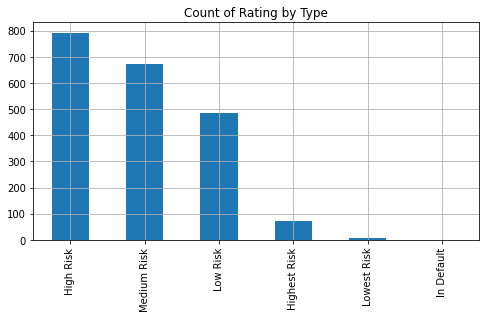

In [ ]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

Unfortunately, given the lack of Credit Ratings classified as `Lowest Risk` and `In Default` we will have to eliminate then from the table. However, the dataset will keep unbalanced and if needed we will have to adress this issue in further steps. 

In [ ]:
df_rating = df_rating[df_rating['Rating']!='Lowest Risk'] # filter Lowest Risk
df_rating = df_rating[df_rating['Rating']!='In Default']  # filter In Default
df_rating.reset_index(inplace = True, drop=True) # reset index

### Descriptive Statistics

Now we will use statistical tools, especially from pandas to improve the understanding from the dataset, especially the numerical features. We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function `describe()` returns information about the distribution of the data such as `quantiles`, `min` and `max`.

In [ ]:
# Statistical summary 
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

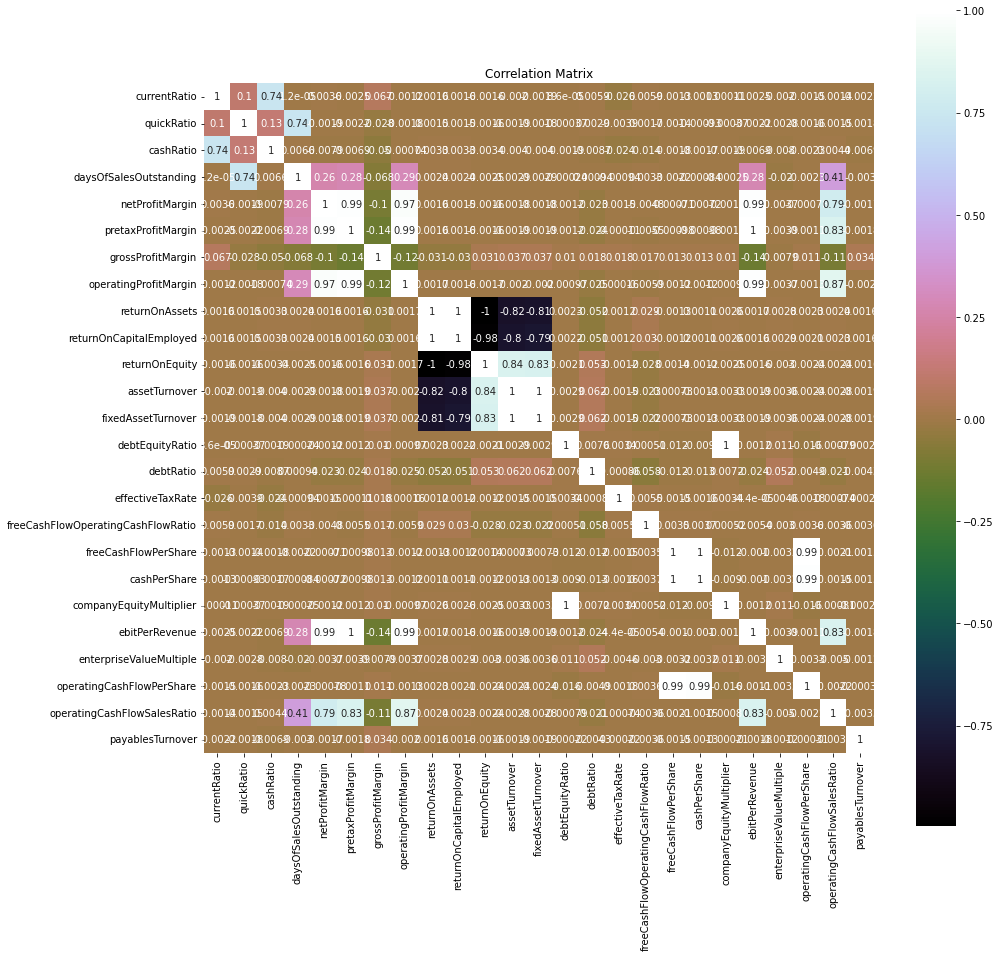

In [ ]:
import graphviz
from sklearn import tree
import graphviz
from sklearn import tree
correlation = df_rating.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.savefig("correlation.png")

### Skewness and Outliers

We observe a lot of skewness in the data with this first exploration. In this case, it means that most variables in the dataset may strong presence of outliers. Taking as observation the table above the first column:

- `currentRatio`: This 50% of its variables between `1.071` and `2.166891`. The minimum value is `-0.932005` however the maximum value is `1725.505005`. It means, in other words, there is a giant outlier that is extremely distant from most points from the data (currentRatio). 

The same pattern can be observed in the following columns such as `quickRatio`,	`cashRatio`, `daysOfSalesOutstanding`, `netProfitMargin` and so on.

To observe how this reflect on the distribution of the data lets make some plots of variables chose randomly.

In [ ]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,4) 
print(column_list)

['debtRatio', 'returnOnAssets', 'payablesTurnover', 'companyEquityMultiplier']


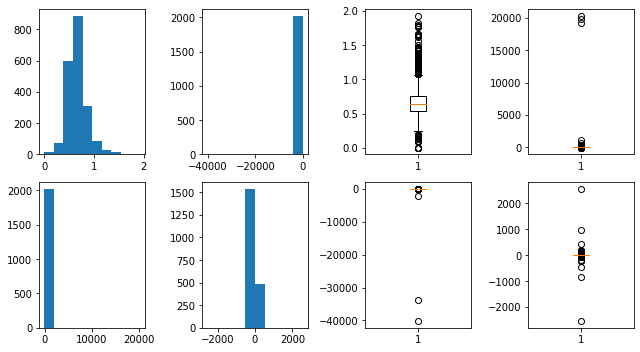

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

As predicted, the data is comtaminated by outliers. We canot observe real behaviour of the distribution because some points differ too much from the others. We will use the function `.skew` from pandas in all columns. It should return between 0 and 1 if a column is normally distributed. 

In [ ]:
df_rating.skew(axis=0)

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

We observe this is a generalized problem. As we can see almost all columns are extremely skewed. We will now go deeper in the investigation of outliers. The following code will return the proportion of outliers in each column . The definition of outlier will be the one from the boxplot - above or bellow `1.5 x IQR`.

In [ ]:
for c in df_rating.columns[6:31]:

    q1 = df_rating[c].quantile(0.25)
    q3 = df_rating[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df_rating.loc[(df_rating[c] < fence_low)  ,c])
    upper_out = len(df_rating.loc[(df_rating[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df_rating)
    print(c, ": "+"{:.2%}".format(prop_out))


currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%


Most columns have a significant number of outliers. However it is not clear for us if there are a few rows that all outliers or each of the rows may be contributing individually with some outliers. We will now check by row the distribution of outliers. We will create a new dataframe that `df_rating_outlier` that will be used with this purpose. In this dataframe every cell will 1 one if the corresponding cell is an outlier in `df_raint` and 0 if it is not.

In [ ]:
df_rating_outlier = df_rating.copy()

for c in df_rating_outlier.columns[6:31]:
    
    q1 = df_rating_outlier[c].quantile(0.25)
    q3 = df_rating_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(df_rating_outlier)):
        
        if df_rating.loc[i,c] < fence_low or df_rating.loc[i,c] > fence_high: # if Outlier
            
            df_rating_outlier.loc[i,c] = 1
        
        else: # Not Outlier
            df_rating_outlier.loc[i,c] = 0

In [ ]:
df_rating_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we will be able to count how many outliers each row has and plot it. 

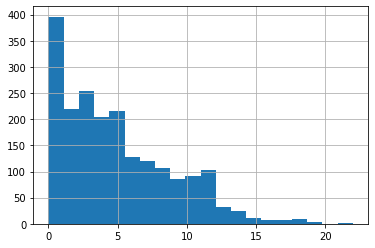

In [ ]:
df_rating_outlier["total"] = df_rating_outlier.sum(axis=1)
df_rating_outlier.total.hist(bins = 20)

This is a very interesting plot. We can see that only up to 400 rows don't have any outliers. Most rows have outliers and maybe they will be useful in the further classification tasks. Therefore we see no value in excluding the outliers from the dataset. However we will perform a transformation on the data so we can reduce its negative impact.

#### Data reshaping

We will now perform the following steps in each of the numerical data. 
1. Normalize the data between 0 and 1 (and multiply by 1.000).
2. Apply log on base 10 on each of the variables. 

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for c in df_rating.columns[6:31]:

    df_rating[[c]] = min_max_scaler.fit_transform(df_rating[[c]].to_numpy())*1000
    df_rating[[c]] = df_rating[c].apply(lambda x: np.log10(x+0.01))

ValueError: ignored

### Again the plots

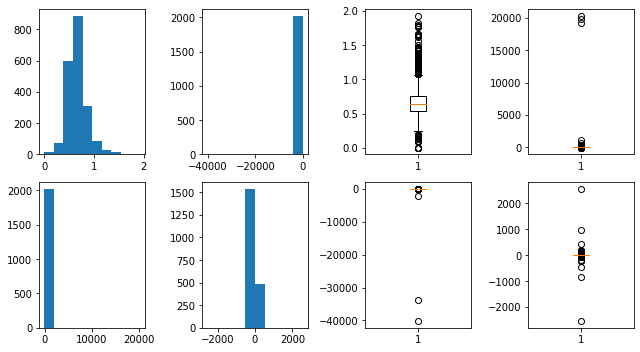

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

We have a problem with respect to vizualisation of the data. The impact of the outliers is so big that we cannot observe the patterns in the data. To enhance our visualization we will from now ignore outliers. We will replace then by values with lower impact such as the lower hinge. In this way we will be able to continue with our EDA. To preserve our dataset we will use a new table called `df_rating_no_out`.

In [ ]:
df_rating_no_out = df_rating.copy()

for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)
    

Now that we have this dataframe we can use it use it to observe the data from a different angle. We will be able to observe the distribution that was hidden by the outliers. The first step:
   - Plot all columns (boxplot) by each label:`High Risk`, `Low Risk`, `Medium Risk`, `Highest Risk`.

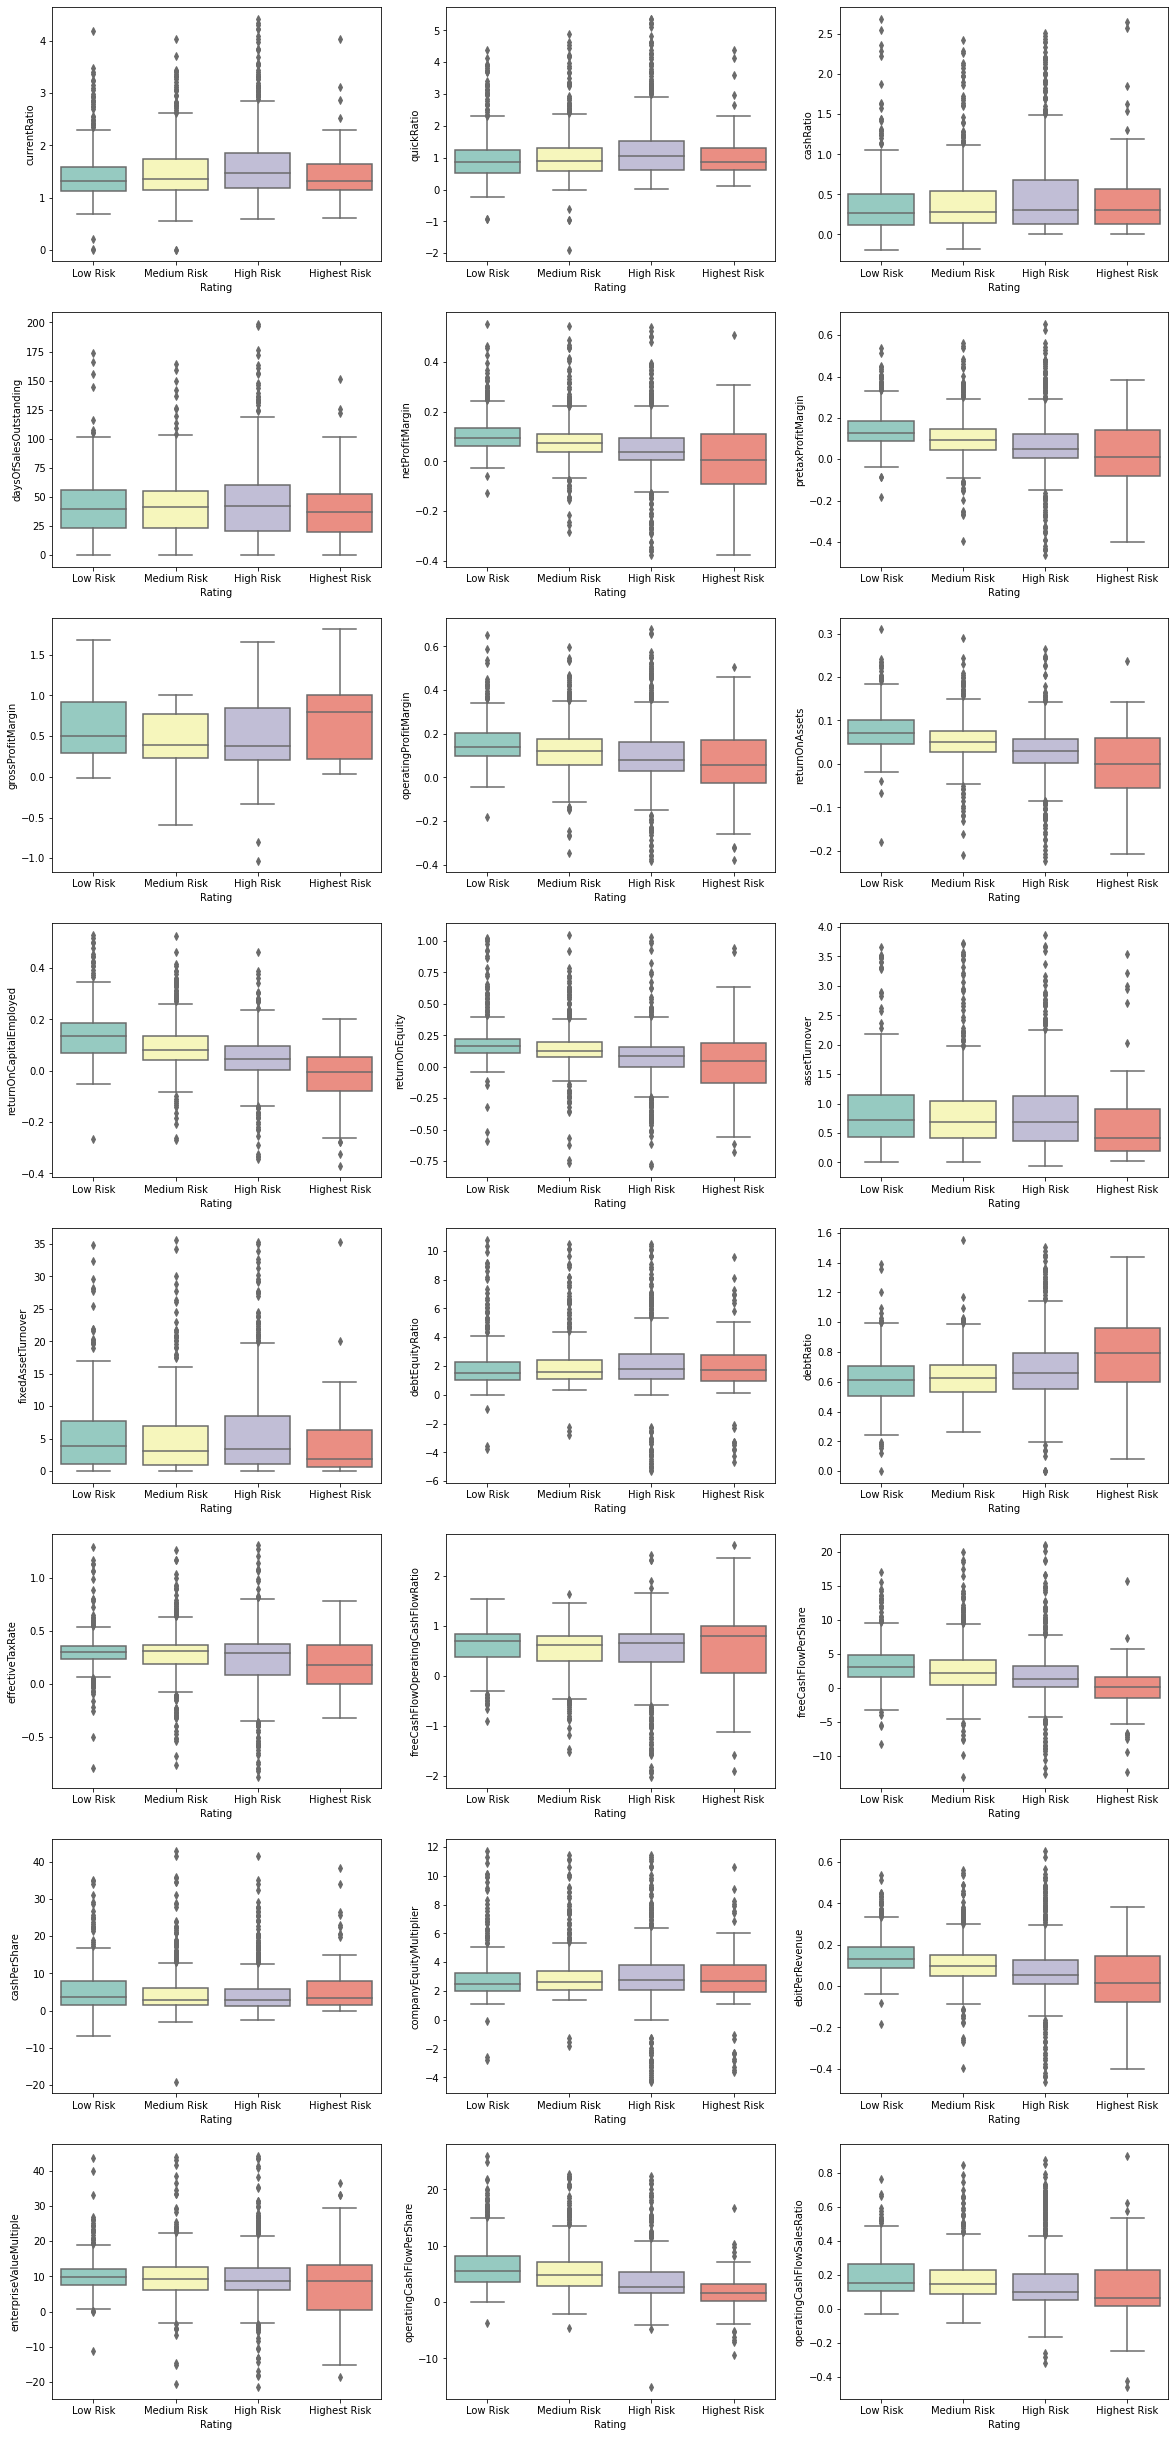

In [ ]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df_rating_no_out.columns[6:30]:
    
    sns.boxplot(x=df_rating_no_out.Rating, y=df_rating_no_out[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1    


The most interesting point about the previous plots is the fact that they clearly show a difference in the medians and distribution according to the rating (Risk). It points to a scenario where the variables will have good predictive power for classification. Following with our analysis we will create scatter plots to see if we can observe who the variables relate to each other and how labels can be observer in respect to it.

In [ ]:
df_rating.colors = 'a'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Low Risk', 'color'] = 'g'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Medium Risk', 'color'] = 'b'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'High Risk','color'] = 'y'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Highest Risk', 'color'] = 'm'

In [ ]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,12) 

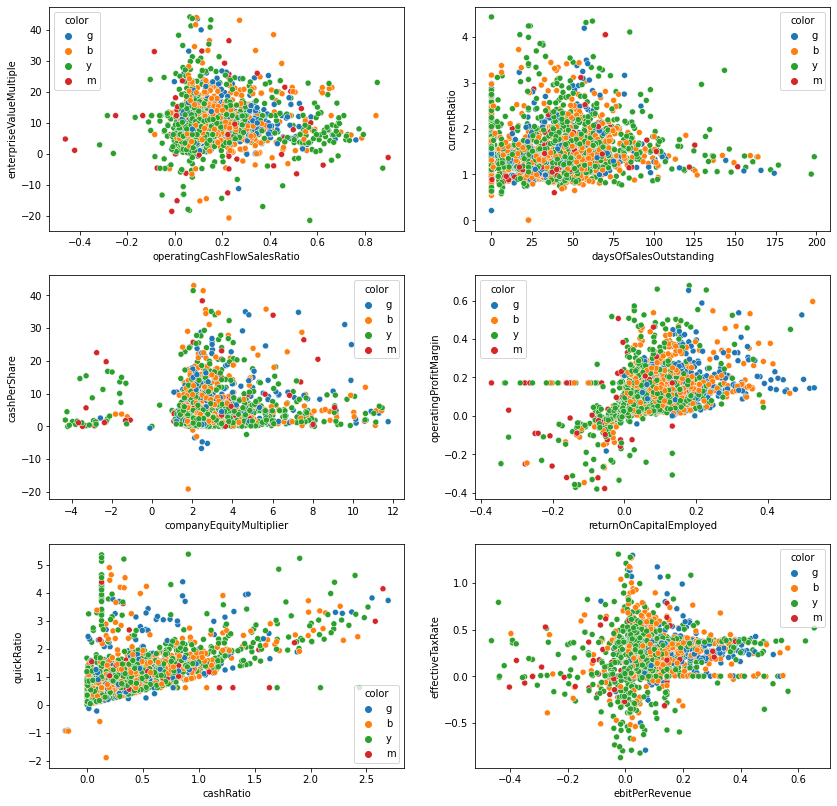

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0 
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = column_list[c], y=column_list[c+1], hue="color", data=df_rating_no_out, ax=axes[j,i])
    
    if i == 1:
        i = 0
        j +=1
    
    else:
        i+=1

In fact, we are working with a dataset that has a big numer of dimensions. With two variables it would not be possible to make any predictions. However this is not the case. Unfortunately we are not able to vizualise the data in all its dimensions, but luckely we will be able to perform accurate classificaitons. 

# Machine Learning 

Is it possible to predict what creidt profile a company will receive from a rating agency based on its financial indicators? If so, what are the most important predictors? Apparently not much work has been done with regards to this question. This academic [paper](https://www.researchgate.net/publication/331386740_Credit_Rating_Forecasting_Using_Machine_Learning_Techniques) was the only work found about it. It is worth checking it out. As we will do it, it tests most ML algorithms and identifies the most important features. 

In the following steps we will perform the following:

1. Prepare the dataset 
    - Split in train and test
    - Transform/Encode the features kand labels
2. Test a wide range of ML models (Tree-based, Probabilistic and so on). 
3. Compare the accuracry of all models. 
4. Choose our winning model and tune hyperparameters to target a higher accuracy.
5. Make a more profound evaluation of the result with a confusion matrix and different measures. 
6. identify the most important features to predict the rating. 



## Prepare the Dataset

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_rating.Sector)
df_rating.Sector = le.transform(df_rating.Sector) # encode sector
le.fit(df_rating.Rating)
df_rating.Rating = le.transform(df_rating.Rating) # encode rating

In [ ]:
 df_train, df_test = train_test_split(df_rating, test_size=0.2, random_state = 1234)

In [ ]:
X_train, y_train = df_train.iloc[:,5:31], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:31], df_test.iloc[:,0]

In [ ]:
y_train

1431    3
1869    0
355     3
973     0
809     2
       ..
1228    3
1077    0
1318    2
723     3
815     2
Name: Rating, Length: 1616, dtype: int64

In [ ]:
df_rating

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,2,1.087731,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,3,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,2,1.138509,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,3,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,2,1.098047,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,2,1.130569,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,3,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,2,1.094653,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,1,7.350267,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2017,0,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,1,2.255972,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2018,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,6,1.051808,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2019,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,6,1.067933,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [ ]:
df_rating.columns

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')

In [ ]:
#(b)	Which variables should be transformed?
#Plot the histograms of transformed variables and explain your finding.

from here

In [ ]:
#(c)	Divide the dataset into two sets (50% Train, 50% Test) and use the same logistic model in pervious sections and predict Card credit.
# split data into train and test
# You need to decide about independent (feature) variables 
feature_cols = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'] 
x = df_rating[feature_cols] # predictor
y = df_rating['Rating'] # response



In [ ]:
#(c)	Divide the dataset into two sets (50% Train, 50% Test) and use the same logistic model in pervious sections and predict Card credit.
# split data into train and test
# You need to decide about independent (feature) variables 
feature_cols = ['Sector','currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin'] 
x = df_rating[feature_cols] # predictor
y = df_rating['Rating'] # response

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  2021 non-null   int64  
 1   currentRatio            2021 non-null   float64
 2   quickRatio              2021 non-null   float64
 3   cashRatio               2021 non-null   float64
 4   daysOfSalesOutstanding  2021 non-null   float64
 5   netProfitMargin         2021 non-null   float64
 6   pretaxProfitMargin      2021 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.6 KB


In [ ]:
# Binarize the output
y = label_binarize(y, classes=[1, 2,3,4,5,6,7,8,9,10])
n_classes = y.shape[1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0) 
# the test set will be 20% of the whole data set

In [ ]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin
1906,3,0.214327,-0.139010,0.017693,0.000000,0.099359,0.148612
476,9,0.991686,0.328980,0.044179,44.436314,0.105339,0.142972
1039,5,0.990935,0.458605,0.019334,67.978748,0.221183,0.351084
1767,7,1.603805,1.574902,0.204863,6.838036,0.031232,0.048842
904,4,1.200865,0.845847,0.257373,58.489132,0.153668,0.240571
...,...,...,...,...,...,...,...
835,9,0.985363,0.600851,0.075189,4.432861,0.141695,0.231428
1216,0,1.732354,1.302677,0.599770,41.424480,0.064648,0.040040
1653,4,1.595469,1.736896,0.609906,44.857926,0.067911,0.086364
559,2,1.188602,0.680746,0.180233,43.916651,0.101267,0.139230


In [ ]:
#(d)	In the model variable card will be used as dependent variable.
#Investigate statistically and visually this variable and suggest an appropriate method to deal with problem. Why we cannot use ordinary regression.
# Logistic Regression
#(e)	Which variables have influence to predict Credit Card? Explain the results as well as goodness of fit criteria.

regressor = OneVsRestClassifier(LogisticRegression(random_state=0,multi_class= 'multinomial'))
fitted= regressor.fit(x_train, y_train)

# let's predict for test set
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_test)
#Let’s evaluate our results on the X_test part of the dataset.
confusion_matrix(y_test, y_pred)
#Given that this consists of a classification problem, 


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ValueError: ignored

In [ ]:
from sklearn import metrics

In [ ]:
#Multinomial Logistic regression Train Accuracy 
metrics.accuracy_score(y_train, regressor.predict(x_train))

0.3712871287128713

In [ ]:
#Multinomial Logistic regression Test Accuracy 
metrics.accuracy_score(y_test, regressor.predict(x_test))

0.4065281899109792

In [ ]:
#4.Report the confusion matrix and ROC plots, you should use Plot ROC curves for the multilabel problem 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


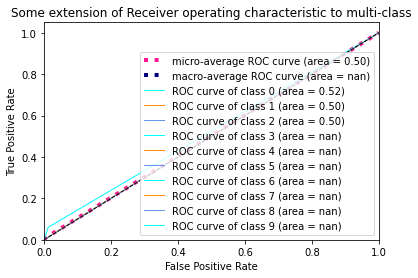

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw=1
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

## linear

In [ ]:

my_svmlinear = OneVsRestClassifier(SVC(kernel='linear',C=1e3,gamma=0.1))
fitted= my_svmlinear.fit(x_train, y_train)

# let's predict for test set
y_pred_svmlinear = my_svmlinear.predict(x_test)
print(y_pred_svmlinear)
#print(y_test)
#Let’s evaluate our results on the X_test part of the dataset.
#confusion_matrix(y_test, y_pred)
#Given that this consists of a classification problem, 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 3 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 4 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 5 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 6 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 7 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_svmlinear[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_svmlinear.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


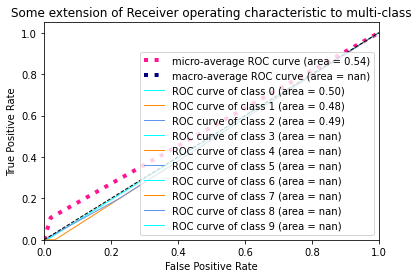

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw=1
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


## nonlinear

In [ ]:
my_svmnon = OneVsRestClassifier(SVC(kernel='rbf',C=1e3,gamma=0.1))
fitted= my_svmnon.fit(x_train, y_train)

# let's predict for test set
y_pred_svmnon = my_svmnon.predict(x_test)
print(y_pred_svmnon)
print(y_test)
#Let’s evaluate our results on the X_test part of the dataset.
#confusion_matrix(y_test, y_pred)
#Given that this consists of a classification problem, 

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 3 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 4 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 5 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 6 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 7 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_svmnon[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_svmnon.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


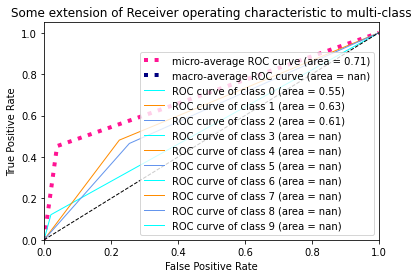

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw=1
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.model_selection import train_test_split

#from sklearn.externals.six import StringIO  this one we don't need it, put a hashtag
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
from sklearn import tree

In [ ]:
x_train

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin
1906,3,0.214327,-0.139010,0.017693,0.000000,0.099359,0.148612
476,9,0.991686,0.328980,0.044179,44.436314,0.105339,0.142972
1039,5,0.990935,0.458605,0.019334,67.978748,0.221183,0.351084
1767,7,1.603805,1.574902,0.204863,6.838036,0.031232,0.048842
904,4,1.200865,0.845847,0.257373,58.489132,0.153668,0.240571
...,...,...,...,...,...,...,...
835,9,0.985363,0.600851,0.075189,4.432861,0.141695,0.231428
1216,0,1.732354,1.302677,0.599770,41.424480,0.064648,0.040040
1653,4,1.595469,1.736896,0.609906,44.857926,0.067911,0.086364
559,2,1.188602,0.680746,0.180233,43.916651,0.101267,0.139230


In [ ]:
clf1dc = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1,random_state=0)
clf1dc.fit(x_train, y_train)
# put max_depth=3, will only shows 3 rows
# y_pred5 = clf1.predict(x_train)
y_preddc = clf1dc.predict(x_test)
y_preddc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import sklearn.metrics
import sklearn.metrics as metrics

In [ ]:

#acc_train = metrics.accuracy_score(y_train, y_pred5)
#print("Accuracy_train: ", acc_train)
acc_test = metrics.accuracy_score(y_test, y_preddc)
print("Accuracy_test: ", acc_test)

Accuracy_test:  0.410484668644906


In [ ]:
x_train.columns

Index(['Sector', 'currentRatio', 'quickRatio', 'cashRatio',
       'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin'],
      dtype='object')

In [ ]:
dc3

NameError: ignored

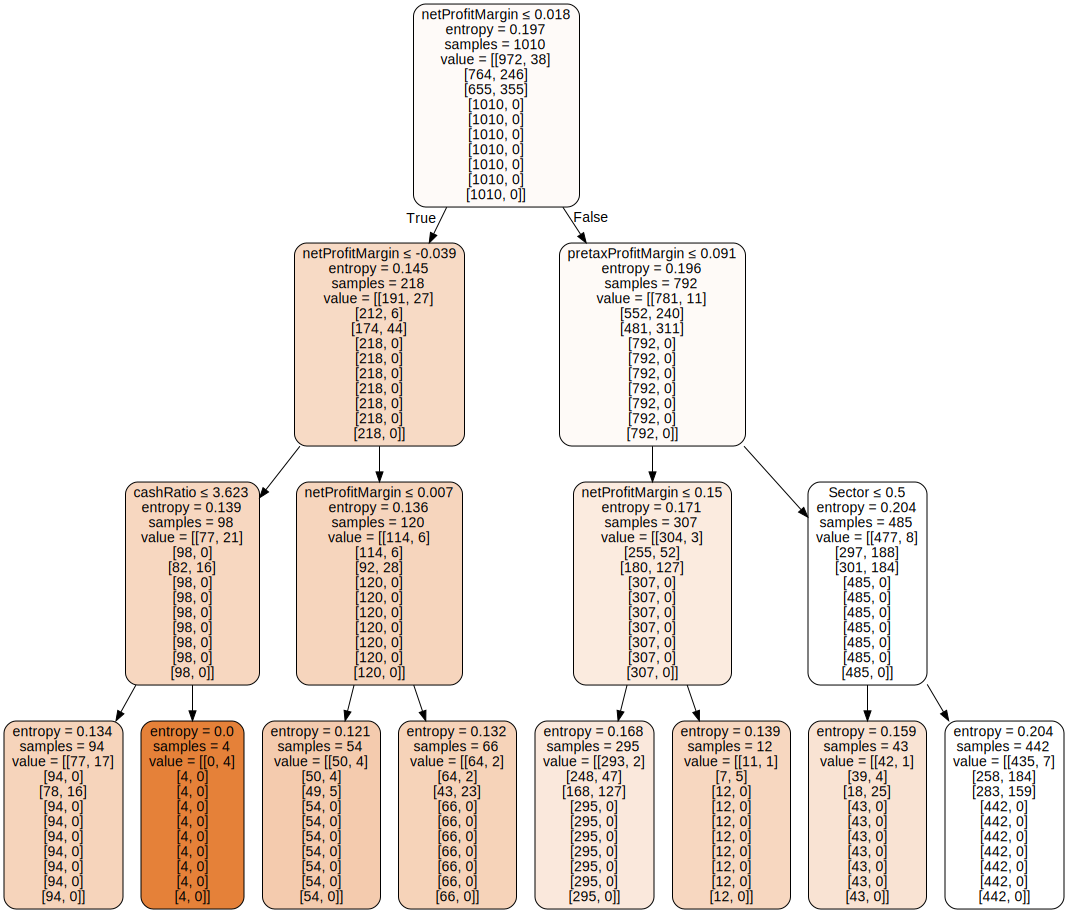

In [ ]:
import graphviz
from sklearn import tree
dc3=['AAA',
 'AA',
 'A',
 'BBB',
 'BB',
 'B',
 'CCC',
 'CC',
 'C',
 'D']
data_graph = tree.export_graphviz(clf1dc,feature_names=x_train.columns,
                         class_names=dc3,
                         out_file=None,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data_graph)
graph 


In [ ]:
rating_dict

{'AAA': 'Lowest Risk',
 'AA': 'Low Risk',
 'A': 'Low Risk',
 'BBB': 'Medium Risk',
 'BB': 'High Risk',
 'B': 'High Risk',
 'CCC': 'Highest Risk',
 'CC': 'Highest Risk',
 'C': 'Highest Risk',
 'D': 'In Default'}

In [ ]:
import graphviz
from sklearn import tree
myclass_names=['AAA': 'Lowest Risk',
 'AA': 'Low Risk',
 'A': 'Low Risk',
 'BBB': 'Medium Risk',
 'BB': 'High Risk',
 'B': 'High Risk',
 'CCC': 'Highest Risk',
 'CC': 'Highest Risk',
 'C': 'Highest Risk',
 'D': 'In Default']
data_graph = tree.export_graphviz(clf1dc,feature_names=dc2,
                         class_names=myclass_names,
                         out_file=None,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data_graph)
graph


# Draw graph
graph = pydotplus.graph_from_dot_data(data_graph)  

# Show graph
Image(graph.create_png())
# Create PDF
graph.write_pdf("DT.pdf")

SyntaxError: ignored

# Fit Models

Now we will test a range of models. In each we will fit the model in the train data, make predictons for the test data and  obtain the accuracy. In later steps we will compare the accuracy of all the models. We will use primarily the library `sklearn` but also `XGBoost`.  




##### XGBoost

In [ ]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =4)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

#### Gradient Boosting Classifier

In [ ]:
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)

#### Random Forest

In [ ]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

#### Support Vector Machine **focus on it**


In [ ]:
SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
SVC_model.fit(X_train, y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:",Accuracy_SVM)


#### Neural Network

In [ ]:
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

#### Naive Bayes

In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

#### Linear Discriminant Analysis

In [ ]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

#### Non-linear

#### Quadratic Discriminant Analysis

In [ ]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train,y_train)
y_pred_QDA = QDA_model.predict(X_test)
Accuracy_QDA = metrics.accuracy_score(y_test, y_pred_QDA)
print("QDA Accuracy:",Accuracy_QDA)

#### K Nearest Neighbours


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

#### Decision Tree **Focus on it**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1)
clf1.fit(train_XXlag,Y_train)
#y_pred5 = clf1.predict(x_train)
y_pred6 = clf1.predict(test_XXlag)

#### Logistic Regression


In [ ]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

## Compare Results

In [ ]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_SVM, Accuracy_MLP, Accuracy_GNB, 
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_LR]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine', 
              "Neural Network", 'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat', 
              'KNN', 'Logistic Regression']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

In [ ]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


We have our winner. XGboost is the best performing model. 

## XGBoost Hyperparameter Tunning

The XGboost model has achieved a very high accuracy given that we have 4 different classes. Now we will try to increase the performance even more. We will use a cross-validation approach and we will follow similar steps to this [tutorial](https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f). First we load the train and test data into DMatrices. `DMatrix` is a data structure used by XGBoost to optimize both memory efficiency and training speed.

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#### The params dictionary
We create a dictonary with the parameters from our previous XGboost model.

In [ ]:
params = XGB_model.get_xgb_params()

In [ ]:
params

We will use the `merror` error parameter from classification. It is basic an accuracy. 

In [ ]:
params['eval_metric'] = "merror"

The num_boost_round which corresponds to the maximum number of boosting rounds that we allow. 

In [ ]:
num_boost_round = 1000

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50,
    verbose_eval=30)

print("Best merror: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

#### Using XGBoost’s CV

In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean merror score. We will use a `k = 5` for every parameter.


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=50,
    verbose_eval=30
)
cv_results.tail()

In [ ]:
cv_results['test-merror-mean'].min()

Now we are ready to start tuning. We will first tune our parameters to minimize the merror on cross-validation, and then check the performance of our model on the test dataset. 

#### Parameters `max_depth` and `min_child_weight`. 

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=50,
        verbose_eval=False

    )
    # Update best merror
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

We get the best score with a max_depth of 9 and min_child_weight of 6, so let's

In [ ]:
params['max_depth'] = 7
params['min_child_weight'] = 5

#### Parameters `subsample` and `colsample_bytree`

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=10,
        verbose_eval=False
    )
    
    # Update best MAE
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

In [ ]:
params['subsample'] =0.9
params['colsample_bytree'] = 0.7

#### Parameter `ETA`


In [ ]:
%time
# This can take some time…
min_merror = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['merror'],
            early_stopping_rounds=10
)
    # Update best score
    mean_mae = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = eta
print("Best params: {}, merror: {}".format(best_params, min_merror))

In [ ]:
params['eta'] = .3

#### Results

This are the final parameters of our tunned model.

In [ ]:
params

Let’s train a model with it and see how well it does on our test set!

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=1000,
    verbose_eval=100
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    verbose_eval=100,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
metrics.accuracy_score(best_model.predict(dtest), y_test)

We did not arrive in an enhanced model with this tunning. Anyone is welcome to continue this tunning and achieve a superior accuracy.

## Confusion Matrix

We will now analyse according to each class the performance of the model. The best way to do it is with a confusion matrix. We can see how many points were missclassified and where were then classified to if not the right rating.

In [ ]:
cm = confusion_matrix(y_test, y_pred_XGB)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds") # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk'])
ax.yaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']);

# This part is to correct a bug from the heatmap funciton from pyplot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

#### Analysis
Given the fact that the dataset is very unbalanced, with have achieved a very low accuracy (actually 0) for very risky companies. To deal with it we wiould have to apply upsampling techniques which we may in a future work. Now we analyse other metrics as Precision, recall and F1 from our targets.

In [ ]:
print(classification_report(y_test, y_pred_XGB, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']))

Apparetly the fact that we have more labels in the edium Risk has enhanced its classification. However, overall we have achieved good classification scaores for most, with the exception of Highest Risk.


## Feature Selection
In our tast task we will identify which features were the most valuable for our model. In our first step we will check if by any chance we can increase the accuracy of our model extracting a feature.

In [ ]:
thresholds = sort(XGB_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

It is not the case. Now lets visualize which are the most relevant features. 

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))
# xgboost.plot_importance(..., ax=ax)

plot_importance(model, ax=ax)
plt.show()

# Visualize Companies

**Bonus**: In this dataset we are working exclusevely with companies that are traded in the stock exchanges from the US. 
Now, we will visualize which companies are considered secure to lend money according to agencies. We will make 4 different wordclouds, one for each rating of risk. 
 
 #### Create a function to generate text for the word cloud
 

In [ ]:
def WCloud(dataframe, column, rating):
    
    words = ''
    
    # iterate through the csv file 
    for val in dataframe.loc[dataframe['Rating'] == rating, column]:
      
        # typecaste each val to string 
        val = str(val)
        val = val.replace(".", "")
        val = val.replace(",", "")

        # split the value 
        tokens = val.split()

        #Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens) + " "
        
    return words

The names of companies usually have different suffixes that are not interesting for us, such as "LLC", "plc", "holding" etc. Therefore we will consider it as stopwords.

In [ ]:
stop_words = ['global', 'incorporated', 'corporation', ' corp', 'industries', 'technologies', 'co', 'inc', 'limited', 'ltd', 'technology', 'resources', 'corp', 'group', 'communications',
             'holdings',' holding', 'plc', 'group', 'oil', 'resource', 'company','international', 'states', 'ag', ' sa', 'pty', 'international', 'united', 'states', 'partners', 'group', 
             'spa', 'se', 'lp', '(the)', 'the', 'LLC', 'n.v', 'service', 'products', 'companies', 'company', 'energy','corporation', 'holdings', 'company', 'limited',
             'holding', 'partners', 'industries', 'nv', 'semiconductor', 'rr', 'usa', 'homes', 'eletric', 'petroleum']

We generate the texts and create remove stopwords.

In [ ]:
comment_wordsHR = WCloud(df_rating, 'Name', 0)
clean_text = [word for word in comment_wordsHR.split() if word not in stop_words]
comment_wordsHR = ' '.join([str(elem) for elem in clean_text])

comment_wordsHRest = WCloud(df_rating, 'Name', 1)
clean_text = [word for word in comment_wordsHRest.split() if word not in stop_words]
comment_wordsHRest = ' '.join([str(elem) for elem in clean_text])

comment_wordsLR = WCloud(df_rating, 'Name', 2)
clean_text = [word for word in comment_wordsLR.split() if word not in stop_words]
comment_wordsLR = ' '.join([str(elem) for elem in clean_text])

comment_wordsMR = WCloud(df_rating, 'Name', 3)
clean_text = [word for word in comment_wordsMR.split() if word not in stop_words]
comment_wordsMR = ' '.join([str(elem) for elem in clean_text])

In this step we use the function `wordcloud` to create the plot.

In [ ]:
wordcloudMR = WordCloud(background_color ='white', colormap="twilight", max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHR) 

wordcloudLR = WordCloud(background_color ='white', colormap="twilight", max_font_size = 25,
                min_font_size = 10).generate(comment_wordsLR) 

wordcloudHR = WordCloud(background_color ='white',  colormap="ocean",max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHR) 

wordcloudHRest = WordCloud(background_color ='white', colormap="gnuplot2",max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHRest) 


We finally plot all together....

In [ ]:
fig = plt.figure(figsize = (17,10))
axes = fig.subplots(nrows=2, ncols=2)

plt.subplot(2, 2, 1)
plt.imshow(wordcloudMR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Medium Risk Companies', fontsize = 27)

plt.subplot(2, 2, 2)
plt.imshow(wordcloudLR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Low Risk Companies', fontsize = 27)

plt.subplot(2, 2, 3)
plt.imshow(wordcloudHR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('High Risk Companies', fontsize = 27)

plt.subplot(2, 2, 4)
plt.imshow(wordcloudHRest, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Highest Risk Companies', fontsize = 27, fontweight = 2)

You may observe that some companies may be in different plots. Thats because they have been rated in different times with different rates.